# toma de datos desde web
# armado de dataframes
# pandas,numpy

In [1]:
from selenium import webdriver
import time

In [2]:
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.clasificados.clarin.com/inicio/index#!/")

titulos2=[]
subtitulos2=[]
listadesep=[]

def functionarie(lista,listasep):
    diccionario={}
    for i in lista:
        diccionario[i]=[]
    keys=[]
    keys.extend(diccionario.keys())
    key=keys[0]
    for i in listasep:
        if i in keys:
            key=i
        else:
            diccionario[key].append(i)
    return diccionario
        
for i in range(1,8):
    titulos=driver.find_element_by_xpath("/html/body/section[3]/section/article[2]/div/div/div[{}]/h2/a/span".format(i))
    #print("\n ------------------------")
    #print(titulos.text)
    titulos2.append(titulos.text)
    #print("\n ------------------------")
    listadesep.append(titulos.text)
    for j in range(1,5):
        subtitulos=driver.find_element_by_xpath("/html/body/section[3]/section/article[2]/div/div/div[{}]/ul/li[{}]".format(i,j))
        #print(subtitulos.text)
        subtitulos2.append(subtitulos.text)
        listadesep.append(subtitulos.text)


#print(titulos2,"\n",subtitulos2,"\n",listadesep)

diccionario=functionarie(titulos2,listadesep)
print(diccionario)
#print(listadesep)

time.sleep(2)


driver.close()

{'Inmuebles': ['Departamentos(3684)', 'Casas(496)', 'Locales Comerciales. Oficinas y Consultorios(332)', 'Habitaciones en Hoteles, Casas de Familias y Pensiones(207)'], 'Automotores': ['Automóviles Nacionales e Importados(723)', '4x4, Pick-up, Vans, Mini Vans, Utilitarios(100)', 'Taxis, Repuestos y Accesorios(39)', 'Planes de ahorro y Chocados(29)'], 'Empleos': ['Oficios y Ocupaciones Varias(661)', 'Choferes, Personal de Transporte y Abastecimiento, Autos(279)', 'Empleados(114)', 'Personal auxiliar de Casas Particulares. Hoteles, Clínicas(89)'], 'Servicios': ['Cuidado de Personas(466)', 'Astrología y Tarot(150)', 'Mudanzas, Fletes y Logística(57)', 'Construcción y Refacciones(53)'], 'Contactos': ['Agradecimientos(78)', 'Solos y Solas(11)', 'Mensajes y Saludos(3)', 'Sociales(1)'], 'Mix': ['Máquinas y otros materiales para industrias y negocios(33)', 'Mascotas y Animales(19)', 'Hogar y Muebles(16)', 'Sex shops(13)'], 'Legales': ['Convocatorias(69)', 'Edictos Judiciales(39)', 'Avisos al C

In [3]:
diccionario['Empleos']

['Oficios y Ocupaciones Varias(661)',
 'Choferes, Personal de Transporte y Abastecimiento, Autos(279)',
 'Empleados(114)',
 'Personal auxiliar de Casas Particulares. Hoteles, Clínicas(89)']

In [4]:
import pandas as pd

In [5]:
df=pd.DataFrame.from_dict(diccionario,orient="index").reset_index()

In [6]:
df

,index,0,1,2,3
0,Inmuebles,Departamentos(3684),Casas(496),Locales Comerciales. Oficinas y Consultorios(332),"Habitaciones en Hoteles, Casas de Familias y P..."
1,Automotores,Automóviles Nacionales e Importados(723),"4x4, Pick-up, Vans, Mini Vans, Utilitarios(100)","Taxis, Repuestos y Accesorios(39)",Planes de ahorro y Chocados(29)
2,Empleos,Oficios y Ocupaciones Varias(661),"Choferes, Personal de Transporte y Abastecimie...",Empleados(114),Personal auxiliar de Casas Particulares. Hotel...
3,Servicios,Cuidado de Personas(466),Astrología y Tarot(150),"Mudanzas, Fletes y Logística(57)",Construcción y Refacciones(53)
4,Contactos,Agradecimientos(78),Solos y Solas(11),Mensajes y Saludos(3),Sociales(1)
5,Mix,Máquinas y otros materiales para industrias y ...,Mascotas y Animales(19),Hogar y Muebles(16),Sex shops(13)
6,Legales,Convocatorias(69),Edictos Judiciales(39),Avisos al Comercio(35),Licitaciones(32)


In [7]:
df.iloc[:3,2]

0                                           Casas(496)
1      4x4, Pick-up, Vans, Mini Vans, Utilitarios(100)
2    Choferes, Personal de Transporte y Abastecimie...
Name: 1, dtype: object

In [8]:
diccionario2={"titulos":[],"subtitulos":[]}


In [9]:
for i in df.T:
    for j in df.T[i]:
        diccionario2["titulos"].append(df.iloc[i,0])
        diccionario2["subtitulos"].append(j)

datosF=pd.DataFrame(diccionario2)


In [10]:
X=datosF.iloc[:,0:1]
Y=datosF.iloc[:,1:]
Y=Y.values

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
x=X
labelencoder_X=LabelEncoder()
labelencoder_X.fit(X)
X=labelencoder_X.transform(X)
print(X)


[3 3 3 3 3 0 0 0 0 0 2 2 2 2 2 6 6 6 6 6 1 1 1 1 1 5 5 5 5 5 4 4 4 4 4]


C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
cx=X.reshape(35,1).astype("float32")
onehotencoder=OneHotEncoder(categorical_features=[0])
X=onehotencoder.fit_transform(cx).toarray()
X

C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
 

In [14]:
from keras.preprocessing.text import one_hot
import numpy as np

Using TensorFlow backend.


In [50]:
def one_hotear(vector,longitud):
    longitud=len(vector)
    yei=[]
    yei=[x for x in one_hot(str(vector),longitud)]
    yei=set(yei)
    yei=np.asarray(list(yei)).astype("int")
    return yei


In [52]:
yei=one_hotear(Y,len(Y))
yei

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [20]:
print(len(X),len(yei_vect))

35 34


In [18]:
def vectorizar(sequences,dimension=35):
    results=np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i,sequences]=1.
    return results

In [19]:
yei_vect=vectorizar(yei)

In [21]:
from keras import models,layers

In [22]:
model=models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(35,)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(7,activation='softmax'))

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
Yvei=yei_vect[:15]
x_train=X[:15]
yei_val=yei_vect[15:29]
x_val=X[15:29]

In [25]:
history=model.fit(Yvei,x_train,epochs=75,batch_size=3,validation_data=(Yvei,x_train))

Train on 15 samples, validate on 15 samples
Epoch 1/75
15/15 [==============================] - 1s 37ms/step - loss: 0.4042 - acc: 0.8571 - val_loss: 0.4025 - val_acc: 0.8571
Epoch 2/75
15/15 [==============================] - 0s 1ms/step - loss: 0.4015 - acc: 0.8571 - val_loss: 0.4000 - val_acc: 0.8571
Epoch 3/75
15/15 [==============================] - 0s 2ms/step - loss: 0.3992 - acc: 0.8571 - val_loss: 0.3978 - val_acc: 0.8571
Epoch 4/75
15/15 [==============================] - 0s 1ms/step - loss: 0.3969 - acc: 0.8571 - val_loss: 0.3956 - val_acc: 0.8571
Epoch 5/75
15/15 [==============================] - 0s 2ms/step - loss: 0.3948 - acc: 0.8571 - val_loss: 0.3933 - val_acc: 0.8571
Epoch 6/75
15/15 [==============================] - 0s 2ms/step - loss: 0.3926 - acc: 0.8571 - val_loss: 0.3911 - val_acc: 0.8571
Epoch 7/75
15/15 [==============================] - 0s 2ms/step - loss: 0.3903 - acc: 0.8571 - val_loss: 0.3889 - val_acc: 0.8571
Epoch 8/75
15/15 [===========================

15/15 [==============================] - 0s 2ms/step - loss: 0.1938 - acc: 0.9333 - val_loss: 0.1915 - val_acc: 0.9333
Epoch 64/75
15/15 [==============================] - 0s 1ms/step - loss: 0.1903 - acc: 0.9333 - val_loss: 0.1876 - val_acc: 0.9333
Epoch 65/75
15/15 [==============================] - 0s 1ms/step - loss: 0.1864 - acc: 0.9333 - val_loss: 0.1839 - val_acc: 0.9333
Epoch 66/75
15/15 [==============================] - 0s 1ms/step - loss: 0.1829 - acc: 0.9333 - val_loss: 0.1800 - val_acc: 0.9429
Epoch 67/75
15/15 [==============================] - 0s 2ms/step - loss: 0.1787 - acc: 0.9429 - val_loss: 0.1762 - val_acc: 0.9429
Epoch 68/75
15/15 [==============================] - 0s 1ms/step - loss: 0.1749 - acc: 0.9429 - val_loss: 0.1724 - val_acc: 0.9429
Epoch 69/75
15/15 [==============================] - 0s 2ms/step - loss: 0.1712 - acc: 0.9429 - val_loss: 0.1686 - val_acc: 0.9524
Epoch 70/75
15/15 [==============================] - 0s 2ms/step - loss: 0.1676 - acc: 0.9524 -

In [37]:
model.predict_classes(yei_vect[33].reshape(35,-1).T)

array([3], dtype=int64)

In [30]:
import matplotlib.pyplot as plt

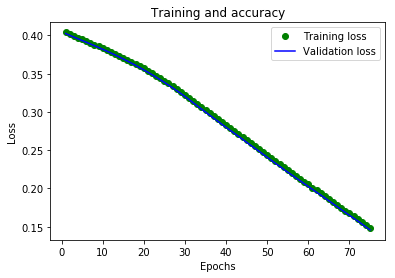

In [31]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'go',label='Training loss')
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [38]:
toastdata=pd.read_csv("test_clarin.csv")

In [39]:
diccionario3={"titulos":[],"subtitulos":[]}
for i in toastdata.T:
    for j in toastdata.T[i]:
        diccionario3["titulos"].append(df.iloc[i,0])
        diccionario3["subtitulos"].append(j)

datosT=pd.DataFrame(diccionario3)
datosT

,titulos,subtitulos
0,Inmuebles,Automotores
1,Inmuebles,Repuestos y Accesorios para Autos. Sistemas de...
2,Inmuebles,"Transporte de Carga, Camiones, Acoplados, Cole..."
3,Inmuebles,Autos de Colección(2)
4,Inmuebles,"Náutica, Aviación, Casas Rodantes, Motorhomes...."
5,Automotores,Empleos
6,Automotores,"Empleados, Vendedores, Ejecutivos de Cuentas, ..."
7,Automotores,Profesionales y Ejecutivos(72)
8,Automotores,"Enseñanza, Capacitación, Cursos y Docentes(27)"
9,Automotores,"Electrónicos. Comunicaciones, Mecánicos, Quími..."


In [89]:
ytest=datosT.iloc[:,1:]

In [90]:
ytest=ytest.values

In [91]:
ytest.shape

(20, 1)

In [92]:
ytest=one_hotear(ytest,len(ytest))

In [93]:
ytest=ytest+34

In [94]:
ytest

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53])

In [99]:
ytest=vectorizar(ytest,len(ytest)+36)

In [100]:
ytest.shape

(18, 54)

In [105]:
#model.predict_classes(ytest[1].reshape(54,-1).T)